In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.sample(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
93198,I186933,C164851,Female,66,Clothing,5,1500.40,Credit Card,18/09/2022,Metrocity
40232,I150246,C106831,Female,28,Food & Beverage,3,15.69,Credit Card,6/1/2022,Kanyon
23294,I288677,C190243,Female,60,Food & Beverage,4,20.92,Credit Card,25/06/2022,Metrocity
64869,I417141,C451346,Male,31,Technology,1,1050.00,Cash,19/09/2022,Cevahir AVM
59417,I109642,C212150,Male,60,Books,2,30.30,Cash,18/06/2022,Viaport Outlet
10063,I248709,C174353,Male,57,Souvenir,3,35.19,Debit Card,29/05/2021,Istinye Park
22777,I932357,C251155,Female,34,Clothing,5,1500.40,Cash,10/8/2021,Cevahir AVM
46737,I251652,C553390,Male,22,Technology,5,5250.00,Debit Card,16/03/2021,Emaar Square Mall
14375,I333918,C149395,Male,50,Clothing,5,1500.40,Credit Card,1/5/2022,Viaport Outlet
70267,I226085,C159508,Female,29,Clothing,5,1500.40,Credit Card,7/1/2021,Mall of Istanbul


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
# Filling null values
for col in df.select_dtypes(["int64","float64"]).columns:
  df[col]=df[col].fillna(df[col].mean())
  print(df[col].mean())

43.42708909377922
3.003428617392441
689.2563209226097


In [ ]:
# Convert categorical variables to numerical values
le=LabelEncoder()
df['shopping_mall']=le.fit_transform(df['shopping_mall'])
df['gender']=le.fit_transform(df['gender'])
df['customer_id']=le.fit_transform(df['customer_id'])

In [ ]:
df['age'].mean()

43.42708909377922

In [ ]:
df.sample(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
56086,I180078,92814,1,21,Souvenir,2,23.46,Debit Card,15/07/2022,6
56625,I151624,43020,0,59,Souvenir,2,23.46,Credit Card,22/10/2022,9
10394,I268940,28251,1,38,Clothing,5,1500.40,Debit Card,6/9/2021,4
12221,I690449,27480,0,19,Cosmetics,4,162.64,Cash,2/11/2022,4
27775,I119976,23870,0,53,Clothing,5,1500.40,Debit Card,29/05/2021,4
9240,I189789,27143,0,30,Shoes,1,600.17,Cash,1/1/2023,4
46760,I281600,34533,1,24,Souvenir,5,58.65,Cash,30/07/2022,7
18350,I292008,10191,1,37,Clothing,4,1200.32,Credit Card,16/01/2021,2
64991,I155061,99140,0,28,Shoes,3,1800.51,Cash,12/4/2021,5
39088,I235858,73913,0,61,Food & Beverage,2,10.46,Credit Card,11/7/2021,1


In [ ]:
# Define age bins
age_bins = [18, 25, 35, 45, np.inf]
age_labels = ['18-25', '26-35', '36-45', '46+']

# Create AgeGroup column
df['ageGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
df['shopping_mall']

0        4
1        2
2        6
3        7
4        4
        ..
99452    4
99453    2
99454    6
99455    3
99456    5
Name: shopping_mall, Length: 99457, dtype: int64

In [ ]:
print(df['age'])

0        28
1        21
2        20
3        66
4        53
         ..
99452    45
99453    27
99454    63
99455    56
99456    36
Name: age, Length: 99457, dtype: int64


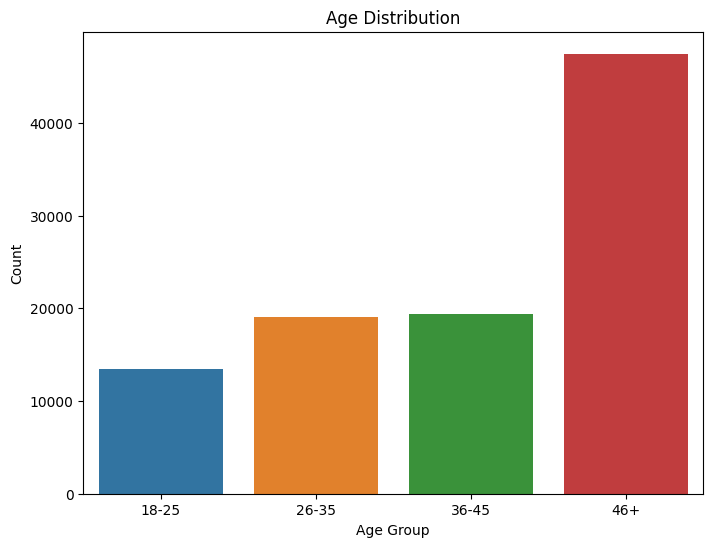

In [ ]:
# Create a bar plot for age distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='ageGroup', data=df)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
#Creating covariance matrix to determine the relation between 'Age' and 'shopping mall'
cov_matrix = np.cov(df['age'], df['shopping_mall'])
print(cov_matrix)

[[ 2.24701713e+02 -1.48120869e-02]
 [-1.48120869e-02  4.81007700e+00]]


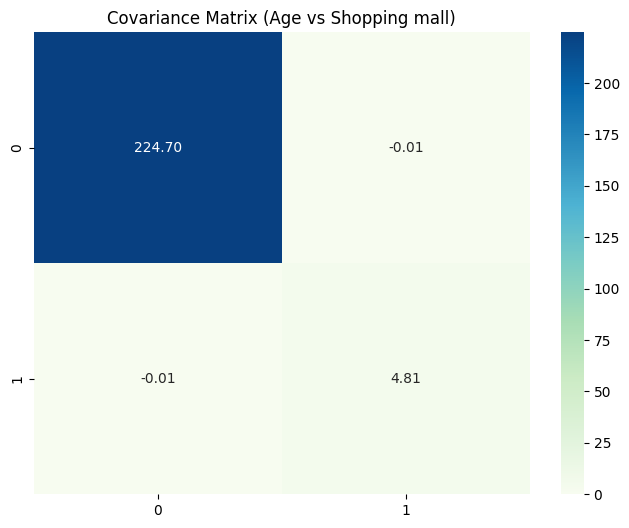

In [ ]:
#Plotting heatmap for the above Covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='GnBu', fmt=".2f")
plt.title('Covariance Matrix (Age vs Shopping mall)')
plt.show()

In [ ]:
# Perform chi-squared test for association between Gender and Shopping mall
contingency_table = pd.crosstab(df['gender'], df['shopping_mall'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results of chi-squared test
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 12.446589184688175
P-value: 0.18928707120988486


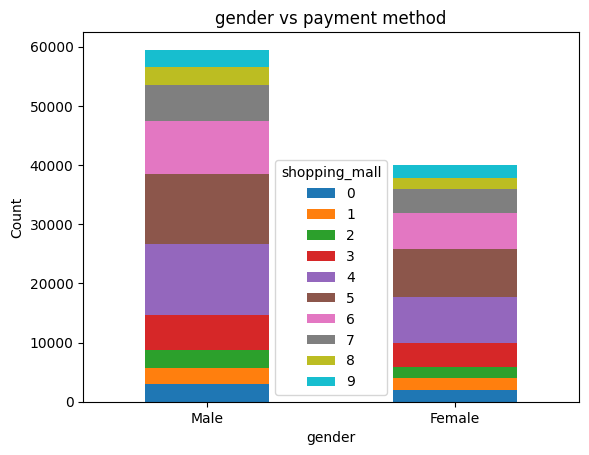

In [ ]:
# Create a stacked bar plot for Gender vs Shopping mall
stacked_bar = contingency_table.plot(kind='bar', stacked=True)
plt.title('gender vs payment method')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

In [ ]:
# Perform independent t-test for between quality and category customers
repeat_ratings = df[df['quantity'] == 1]['category']
non_repeat_ratings = df[df['quantity'] == 0]['category']
t_stat, p_value = ttest_ind(repeat_ratings, non_repeat_ratings)

# Display results of t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: nan
P-value: nan


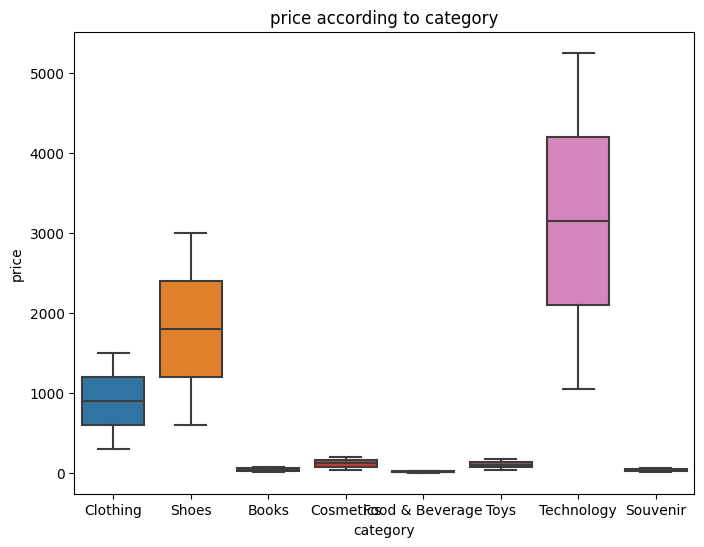

In [ ]:
# Create box plots for  price according to category
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title('price according to category')
plt.xlabel('category')
plt.ylabel('price')
plt.show()